# Before Convolutional Neural Network

## Real Game : CIFAR-10

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [ ]:
'''
matplolib inline 명령어를 통해서
matplot으로 그리는 플롯들을 주피터 노트북 내에서 볼 수 있게 해준다.
포맷을 retina로 바꾸면 그래프의 화질이 훨씬 좋아진다.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import random as rd

from sklearn.metrics import accuracy_score

### 데이터를 불러옵시다.

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

In [ ]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
labels = { 0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 6473
다음 그림은 Truck 입니다.


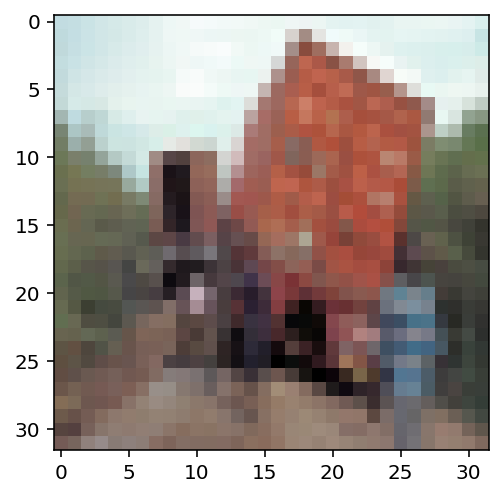

In [ ]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format( labels[test_y[id][0]] ))
plt.imshow(test_x[id])
plt.show()

In [ ]:
print('max :', train_x.max(),'  min :', train_x.min())

max : 255   min : 0


### 코드를 완성해주세요!

해야 할 일

1. 전처리
    * x, y에 대하여 모두! 단, x에 대하여 reshape를 의도한 것은 아닙니다!

2. 모델링
    * 이미지 데이터를 펼쳐주는 레이어를 사용하세요.
    * 히든 레이어 4개 사용, 각 노드는 512, 512, 256, 128
    * 이 문제는 회귀? 분류?

3. 학습
    * epochs=50, validation_split=0.2, early stopping
    * epoch별 accuracy, loss가 보고 싶다면 history라는 변수에 담아내자!

In [ ]:
#############
# Your Code #
#############
train_x.shape, test_x.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
#train_x = train_x.reshape(train_x.shape[0], -1)
#test_x = test_x.reshape(test_x.shape[0], -1)

In [ ]:
#train_x.shape, test_x.shape

((50000, 3072), (10000, 3072))

In [ ]:
from tensorflow.keras.utils import to_categorical 

In [ ]:
train_y.shape, test_y.shape

((50000, 1), (10000, 1))

In [ ]:
n = len(set(train_y.reshape(train_y.shape[0])))
n

10

In [ ]:
#############
# Your Code #
#############
train_y = to_categorical(train_y, n) 
test_y = to_categorical(test_y, n)

In [ ]:
train_y.shape, test_y.shape

((50000, 10), (10000, 10))

In [ ]:
#############
# Your Code #
#############
max_x, min_x = train_x.max(), train_x.min()
max_x, min_x

(255, 0)

In [ ]:
train_x = (train_x - min_x) / (max_x - min_x)
test_x = (test_x - min_x) / (max_x - min_x)

In [ ]:
train_x.max(), train_x.min()

(1.0, 0.0)

In [ ]:
test_x.max(), test_x.min()

(1.0, 0.0)

In [ ]:
from sklearn import metrics
#############
# Your Code #
#############
keras.backend.clear_session()

model = keras.models.Sequential()

model.add( keras.layers.Input( shape=(train_x.shape[1], train_x.shape[2], train_x.shape[3])))
model.add( keras.layers.Flatten())
model.add( keras.layers.Dense(512, activation='relu'))
model.add( keras.layers.Dense(512, activation='relu'))
model.add( keras.layers.Dense(256, activation='relu'))
model.add( keras.layers.Dense(128, activation='relu'))
model.add( keras.layers.Dense(n, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,001,546
Trainable params: 2,001,546
Non-

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping 

In [ ]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [ ]:
train_x.shape, test_x.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
train_y.shape, test_y.shape

((50000, 10), (10000, 10))

In [ ]:
history = model.fit(train_x,
          train_y,
          epochs=50,
          verbose=1,
          callbacks=[es],
          validation_split=0.2)

Epoch 1/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9017 - accuracy: 0.3040 - val_loss: 1.8227 - val_accuracy: 0.3363
Epoch 2/50
1250/1250 [==============================] - 6s 4ms/step - loss: 1.7338 - accuracy: 0.3720 - val_loss: 1.6862 - val_accuracy: 0.4012
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6527 - accuracy: 0.4037 - val_loss: 1.6639 - val_accuracy: 0.3992
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5900 - accuracy: 0.4282 - val_loss: 1.6055 - val_accuracy: 0.4204
Epoch 5/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5422 - accuracy: 0.4444 - val_loss: 1.5814 - val_accuracy: 0.4311
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5013 - accuracy: 0.4590 - val_loss: 1.6129 - val_accuracy: 0.4261
Epoch 7/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4766 - accuracy: 0.4692 - val_loss: 1.5683 - val_accuracy:

In [ ]:
performance_test = model.evaluate(test_x, test_y)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 1.4688 - accuracy: 0.4870
Test Loss : 1.468797,  Test Accuracy : 48.700%


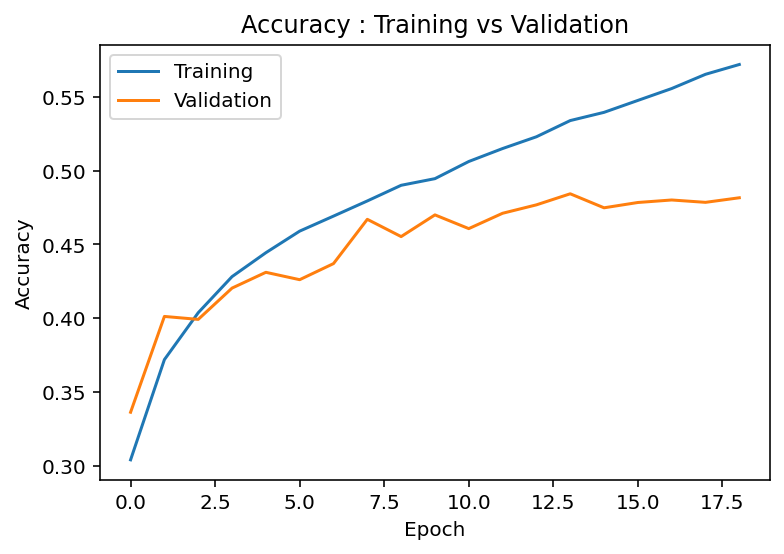

In [ ]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

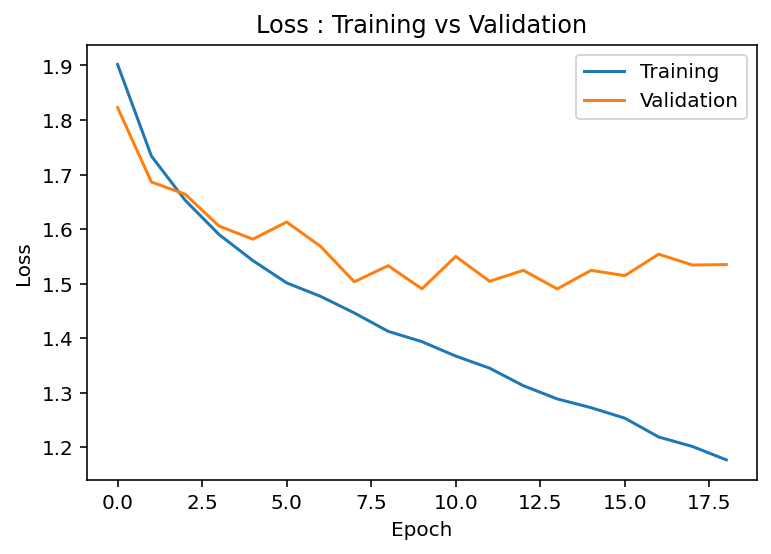

In [ ]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [ ]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)


print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 54.97%
테스트 정확도 : 48.70%


id = 9843
다음 그림은 Automobile 입니다.
모델의 예측 : Automobile
모델의 카테고리별 확률 : 
{'Airplane': 0.0, 'Automobile': 57.0, 'Bird': 0.0, 'Cat': 0.0, 'Deer': 0.0, 'Dog': 0.0, 'Frog': 0.0, 'Horse': 0.0, 'Ship': 41.0, 'Truck': 1.0}
정답입니다


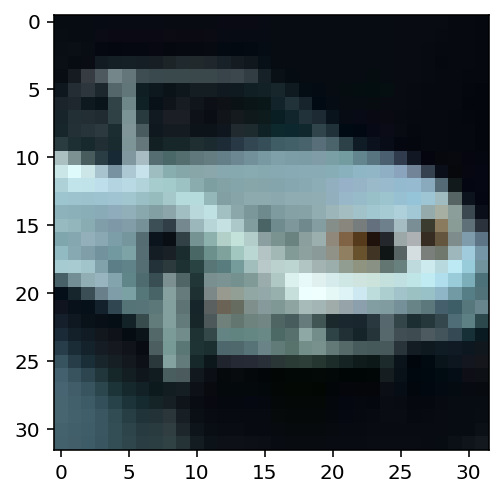

In [ ]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format(labels[test_y.argmax(axis=1)[id]] ))
print('모델의 예측 : {}'.format(labels[single_pred_test[id]] ))

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()